## Импорт библиотек

In [59]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")


## Загрузка cleaned-данных

In [60]:
PROJECT_ROOT = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(PROJECT_ROOT, "data", "cleaned_data.csv")

df = pd.read_csv(DATA_PATH)
df.head()


,timestamp,age_group,gender,status,sleep_duration,sleep_quality,night_awakenings,nap_frequency,nap_duration,nap_time,nap_reason,productivity_today,productivity_week,task_completion,stress_current,stress_week,stress_month,anxiety_current,anxiety_week,anxiety_month,fatigue_current,fatigue_week,fatigue_month,workouts_per_week,workout_duration,activity_type,diet_quality,skip_meals,fast_food_per_week,caffeine_daily,caffeine_last_time,screen_time_daily,screen_time_late,screen_sleep_impact,life_satisfaction_current,life_satisfaction_month,satisfaction_work,satisfaction_social,satisfaction_health,satisfaction_emotional,night_awakenings_raw,night_awakenings_3plus
0,2025-12-20 20:04:51,22–25,Female,Working and studying,7–8 hours,7.0,0.0,Never,I do not nap,I do not nap,I do not nap,7.0,7.0,Average,8.0,7.0,6.0,8.0,8.0,6.0,5.0,5.0,5.0,3–4,60–120 min,Cardio,5.0,Sometimes,0,1,Morning only,6–8 hours,>2 hours,Minor impact,7.0,7.0,8.0,7.0,6.0,4.0,0,0
1,2025-12-20 16:57:12,18–21,Male,Student,7–8 hours,7.0,2.0,Never,I do not nap,I do not nap,I do not nap,8.0,8.0,Average,7.0,8.0,10.0,7.0,7.0,7.0,6.0,7.0,6.0,3–4,60–120 min,Cardio,7.0,Sometimes,1–2,0,No regular pattern,6–8 hours,1–2 hours,Moderate negative impact,8.0,6.0,8.0,7.0,8.0,5.0,2,0
2,2025-12-20 16:26:50,18–21,Male,Student,6–7 hours,6.0,1.0,Never,20–40 min,After 16:00,Lack of night sleep,6.0,6.0,Average,8.0,8.0,5.0,6.0,7.0,4.0,8.0,7.0,4.0,3–4,60–120 min,Strength training,8.0,Never,1–2,2,Afternoon,4–6 hours,30–60 min,Moderate negative impact,7.0,6.0,5.0,7.0,8.0,7.0,1,0
3,2025-12-20 16:23:31,18–21,Female,Student,6–7 hours,7.0,0.0,1–2 times per week,20–40 min,After 16:00,Physical or mental fatigue,7.0,9.0,Average,8.0,8.0,4.0,8.0,8.0,5.0,6.0,6.0,4.0,3–4,60–120 min,Strength training,4.0,Often,1–2,0,No regular pattern,6–8 hours,1–2 hours,Moderate negative impact,7.0,9.0,6.0,6.0,7.0,7.0,0,0
4,2025-12-20 16:19:20,18–21,Male,Student,6–7 hours,9.0,0.0,Never,I do not nap,I do not nap,I do not nap,5.0,6.0,Average,6.0,8.0,6.0,4.0,6.0,4.0,4.0,4.0,4.0,1–2,60–120 min,Walking,4.0,Rarely,0,0,No regular pattern,4–6 hours,30–60 min,Minor impact,7.0,7.0,6.0,7.0,7.0,7.0,0,0


## Общая структура данных
На данном этапе анализируется размер выборки, типы переменных и наличие пропусков.
Это позволяет убедиться, что данные корректны и готовы к анализу.

In [61]:
df.shape

(107, 42)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  107 non-null    object 
 1   age_group                  107 non-null    object 
 2   gender                     107 non-null    object 
 3   status                     107 non-null    object 
 4   sleep_duration             107 non-null    object 
 5   sleep_quality              107 non-null    float64
 6   night_awakenings           107 non-null    float64
 7   nap_frequency              107 non-null    object 
 8   nap_duration               107 non-null    object 
 9   nap_time                   107 non-null    object 
 10  nap_reason                 107 non-null    object 
 11  productivity_today         107 non-null    float64
 12  productivity_week          107 non-null    float64
 13  task_completion            107 non-null    object 

In [63]:
df.isna().sum().sort_values(ascending=False)

timestamp                    0
age_group                    0
gender                       0
status                       0
sleep_duration               0
sleep_quality                0
night_awakenings             0
nap_frequency                0
nap_duration                 0
nap_time                     0
nap_reason                   0
productivity_today           0
productivity_week            0
task_completion              0
stress_current               0
stress_week                  0
stress_month                 0
anxiety_current              0
anxiety_week                 0
anxiety_month                0
fatigue_current              0
fatigue_week                 0
fatigue_month                0
workouts_per_week            0
workout_duration             0
activity_type                0
diet_quality                 0
skip_meals                   0
fast_food_per_week           0
caffeine_daily               0
caffeine_last_time           0
screen_time_daily            0
screen_t

## Распределения ключевых outcome-переменных
Данный блок показывает общее состояние выборки:
уровень стресса, удовлетворённости жизнью, тревожности и усталости.
Это позволяет понять фоновые характеристики респондентов.

### Стресс  

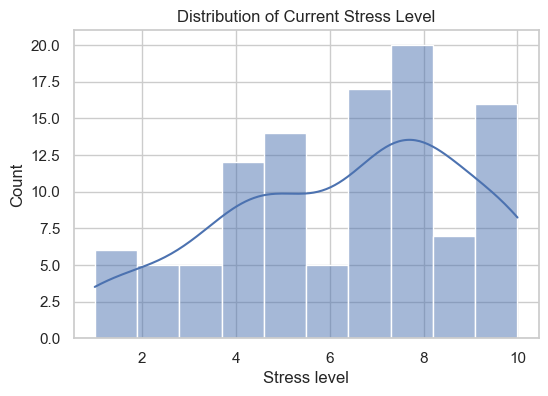

In [64]:
plt.figure(figsize=(6,4))
sns.histplot(df["stress_current"], bins=10, kde=True)
plt.title("Distribution of Current Stress Level")
plt.xlabel("Stress level")
plt.ylabel("Count")
plt.show()

#### Распределение текущего уровня стресса

График распределения текущего уровня стресса показывает, что большинство респондентов оценивают свой стресс как средний или выше среднего. Основная часть значений находится в диапазоне от 5 до 8 баллов. Низкие уровни стресса встречаются заметно реже, тогда как небольшая часть участников сообщает о высоком уровне стресса, близком к максимальным значениям шкалы. Это говорит о том, что выборка в целом характеризуется повышенной нагрузкой и содержит достаточную вариативность для анализа факторов, связанных со стрессом.


### Тревожность и усталость

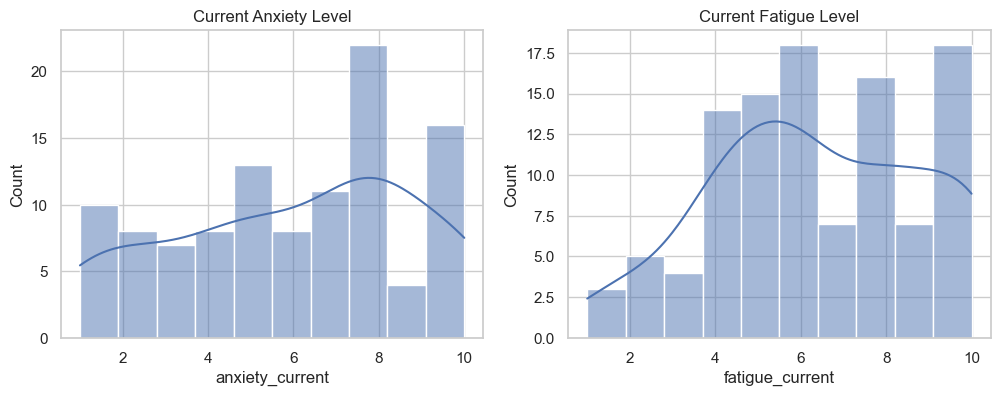

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["anxiety_current"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Current Anxiety Level")

sns.histplot(df["fatigue_current"], bins=10, kde=True, ax=axes[1])
axes[1].set_title("Current Fatigue Level")

plt.show()

#### Распределение текущего уровня тревожности

Распределение тревожности более растянуто по шкале по сравнению со стрессом. Значительная часть ответов сосредоточена в диапазоне от 6 до 9 баллов, однако присутствуют и низкие значения. Такая форма распределения указывает на высокую индивидуальную разницу в уровне тревожности среди респондентов. Это позволяет рассматривать тревожность как чувствительный показатель, который может по-разному реагировать на повседневные привычки и условия жизни.



#### Распределение текущего уровня усталости

График уровня усталости показывает, что большинство участников ощущают себя уставшими на среднем или высоком уровне. Значения в диапазоне от 5 до 9 баллов встречаются чаще всего, тогда как низкая усталость наблюдается редко. Такое распределение может отражать накопленный эффект повседневных нагрузок, таких как учёба, работа и недостаточный отдых. Усталость в данной выборке выступает важным показателем общего состояния и может быть связана как с режимом сна, так и с уровнем стресса.

### Удовлетворённость жизнью

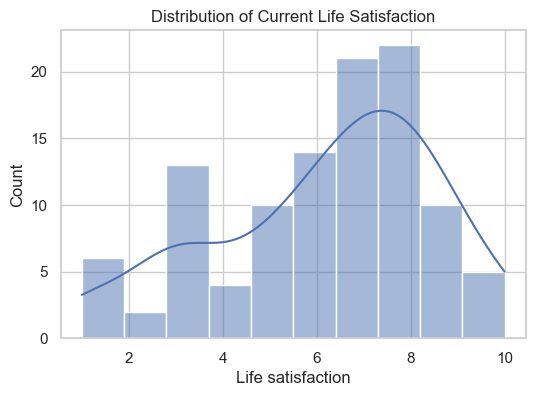

In [66]:
plt.figure(figsize=(6,4))
sns.histplot(df["life_satisfaction_current"], bins=10, kde=True)
plt.title("Distribution of Current Life Satisfaction")
plt.xlabel("Life satisfaction")
plt.ylabel("Count")
plt.show()

#### Распределение текущей удовлетворённости жизнью

Несмотря на повышенные уровни стресса и усталости, большинство респондентов оценивают свою текущую удовлетворённость жизнью как среднюю или высокую. Наиболее часто встречающиеся значения находятся в диапазоне от 6 до 8 баллов. Очень низкая удовлетворённость жизнью встречается редко. Это говорит о том, что субъективное ощущение благополучия не всегда напрямую зависит от уровня стресса и усталости и может поддерживаться другими факторами, такими как социальные связи, физическое состояние или адаптационные механизмы.

#### Итоговый вывод по распределениям

Анализ распределений ключевых показателей показывает, что выборка характеризуется умеренно высоким уровнем стресса, тревожности и усталости, при этом общая удовлетворённость жизнью у большинства респондентов остаётся на относительно высоком уровне. Все показатели имеют достаточную вариативность, что делает данные подходящими для дальнейшего анализа и моделирования. Наблюдаемый контраст между нагрузкой и субъективным благополучием подчёркивает необходимость более детального анализа повседневных привычек и условий жизни, которые могут смягчать или усиливать влияние стресса на общее состояние человека.


## Распределения повседневных привычек
В данном блоке анализируется вариативность ключевых lifestyle-факторов.
Наличие разнообразия в привычках критично для последующего моделирования.

### Качество сна

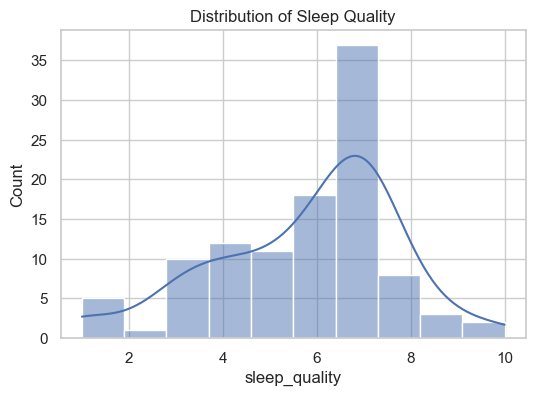

In [67]:
plt.figure(figsize=(6,4))
sns.histplot(df["sleep_quality"], bins=10, kde=True)
plt.title("Distribution of Sleep Quality")
plt.show()

#### Распределение качества сна

График распределения качества сна показывает, что большинство респондентов оценивают свой сон как средний или выше среднего. Основная часть значений сосредоточена в диапазоне от 5 до 7 баллов. Низкое качество сна встречается реже, однако такие случаи присутствуют, что указывает на неоднородность режима сна в выборке. Также наблюдаются отдельные высокие оценки качества сна, что говорит о наличии респондентов с устойчиво хорошим режимом отдыха. В целом распределение демонстрирует достаточную вариативность, позволяющую анализировать связь сна с другими показателями состояния.

### Экранное время (категории)

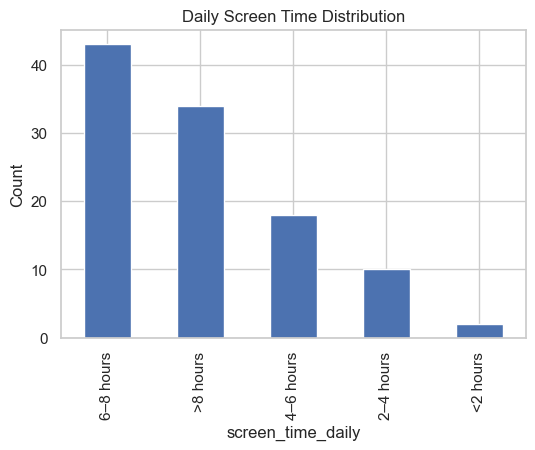

In [68]:
plt.figure(figsize=(6,4))
df["screen_time_daily"].value_counts().plot(kind="bar")
plt.title("Daily Screen Time Distribution")
plt.ylabel("Count")
plt.show()

#### Распределение дневного экранного времени

Распределение дневного экранного времени показывает, что большинство участников проводят за экранами значительную часть дня. Наиболее распространённой категорией является интервал от 6 до 8 часов в день, за которым следует категория более 8 часов. В то же время относительно небольшая часть респондентов сообщает о низком экранном времени (менее 4 часов в день). Это указывает на то, что для большинства участников активное использование цифровых устройств является повседневной нормой и потенциально может оказывать влияние на сон и общее самочувствие.

### Физическая активность

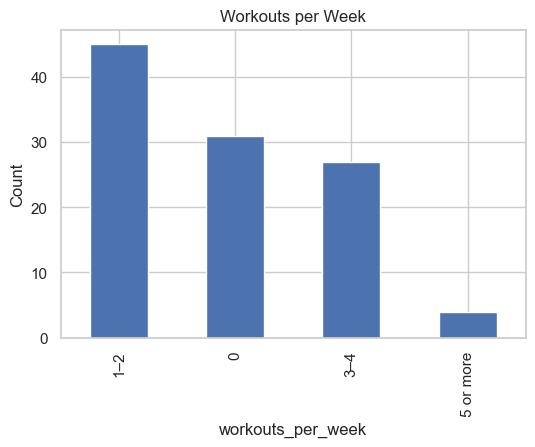

In [69]:
plt.figure(figsize=(6,4))
df["workouts_per_week"].value_counts().plot(kind="bar")
plt.title("Workouts per Week")
plt.ylabel("Count")
plt.show()

#### Распределение количества тренировок в неделю

График количества тренировок в неделю показывает, что наиболее распространённым вариантом является нерегулярная или умеренная физическая активность. Большая часть респондентов либо тренируется 1–2 раза в неделю, либо вовсе не имеет регулярных тренировок. Категория с более высокой частотой занятий (3–4 раза в неделю) встречается реже, а очень высокая физическая активность (5 и более тренировок) характерна лишь для небольшой части выборки. Это говорит о том, что регулярные занятия спортом не являются доминирующей привычкой среди участников и могут играть важную роль в различиях уровня благополучия.

#### Итоговый вывод по повседневным привычкам

Анализ распределений повседневных привычек показывает, что выборка характеризуется умеренным качеством сна, высоким уровнем экранного времени и в целом невысокой регулярностью физической активности. При этом все рассмотренные привычки демонстрируют достаточное разнообразие значений, что делает их информативными для дальнейшего анализа. Наличие выраженных различий в режиме сна, использовании экранов и уровне физической активности создаёт основу для изучения того, как сочетание этих факторов связано с уровнем стресса, усталости и субъективного благополучия.


## Связи «привычка -> состояние»
В данном разделе визуализируются ассоциативные связи между привычками
(сон, экранное время, физическая активность) и показателями благополучия.
Полученные зависимости не интерпретируются как причинно-следственные.

### Сон и стресс

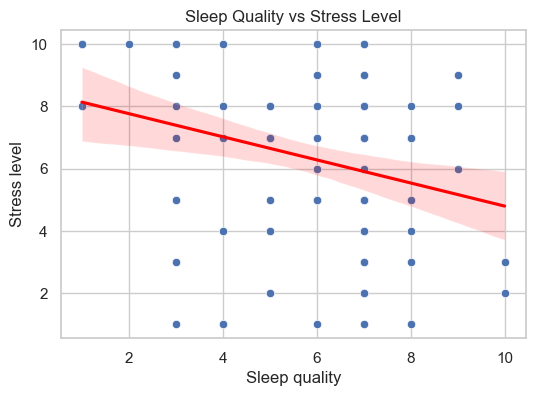

In [70]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["sleep_quality"],
    y=df["stress_current"]
)
sns.regplot(
    x=df["sleep_quality"],
    y=df["stress_current"],
    scatter=False,
    color="red"
)
plt.title("Sleep Quality vs Stress Level")
plt.xlabel("Sleep quality")
plt.ylabel("Stress level")
plt.show()

#### Связь качества сна и уровня стресса

График, показывающий связь между качеством сна и текущим уровнем стресса, демонстрирует заметную отрицательную тенденцию. По мере роста качества сна уровень стресса в среднем снижается. При низких значениях качества сна чаще наблюдаются высокие уровни стресса, тогда как при более высоком качестве сна значения стресса становятся ниже и более равномерными. Несмотря на разброс отдельных наблюдений, общая направленность зависимости указывает на то, что качество сна является важным фактором, связанным с уровнем стресса. 

### Экран перед сном и качество сна

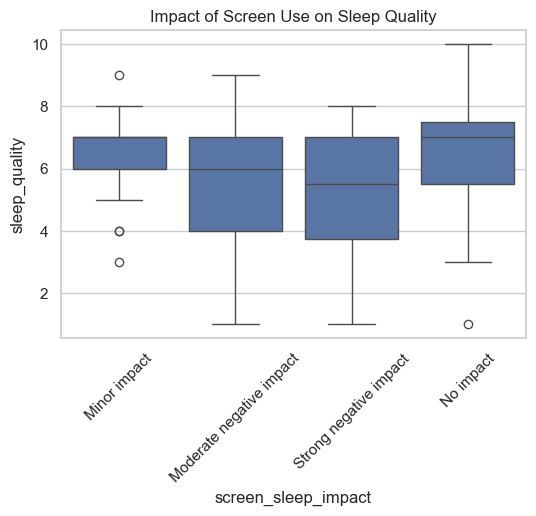

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="screen_sleep_impact",
    y="sleep_quality",
    data=df
)
plt.title("Impact of Screen Use on Sleep Quality")
plt.xticks(rotation=45)
plt.show()


#### Влияние использования экранов перед сном на качество сна

Анализ распределений качества сна в зависимости от субъективной оценки влияния экранов перед сном показывает чёткие различия между группами. Респонденты, отмечающие отсутствие или минимальное влияние экранов, в среднем имеют более высокое качество сна. Напротив, при умеренном и сильном негативном влиянии экранного времени наблюдается снижение медианных значений качества сна и больший разброс ответов. Это говорит о том, что использование экранов перед сном связано с ухудшением субъективного восприятия сна, хотя степень этого влияния может различаться у разных людей.

### Физическая активность и удовлетворённость жизнью

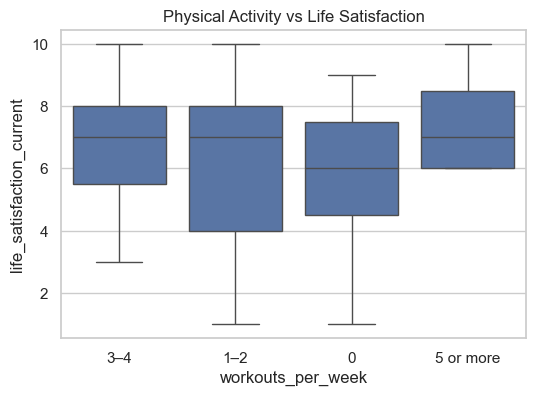

In [72]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="workouts_per_week",
    y="life_satisfaction_current",
    data=df
)
plt.title("Physical Activity vs Life Satisfaction")
plt.show()

#### Связь физической активности и удовлетворённости жизнью

График, отражающий связь между частотой физических тренировок и текущей удовлетворённостью жизнью, показывает, что более высокая физическая активность в целом ассоциируется с более высокими оценками удовлетворённости жизнью. У респондентов, тренирующихся 3–4 раза в неделю или чаще, медианные значения удовлетворённости выше по сравнению с теми, кто не занимается спортом или делает это нерегулярно. При этом внутри каждой группы сохраняется значительная вариативность, что указывает на влияние дополнительных факторов помимо физической активности.

### Итоговый вывод по связям «привычка → состояние»

Анализ связей между повседневными привычками и показателями психоэмоционального состояния показывает, что качество сна, использование экранов перед сном и уровень физической активности связаны с уровнем стресса и субъективным благополучием. Лучшее качество сна ассоциируется с более низким уровнем стресса, минимальное использование экранов перед сном связано с более высоким качеством сна, а регулярная физическая активность — с большей удовлетворённостью жизнью. Эти результаты подтверждают целесообразность дальнейшего анализа данных с использованием моделей машинного обучения для более детального изучения относительного вклада различных привычек, при этом полученные зависимости рассматриваются как ассоциации, а не доказательства причинности.


## Связь длительности сна с композитным индексом стресса

In [74]:
df["stress_index"] = df[
    ["stress_current", "stress_week", "stress_month"]
].mean(axis=1)

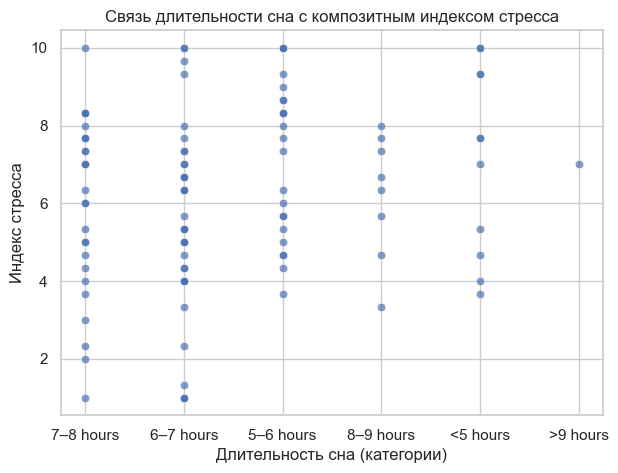

In [76]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df,
    x="sleep_duration",
    y="stress_index",
    alpha=0.7
)

plt.title("Связь длительности сна с композитным индексом стресса")
plt.xlabel("Длительность сна (категории)")
plt.ylabel("Индекс стресса")

plt.show()


График показывает тенденцию к снижению индекса стресса при увеличении длительности сна, однако связь не является строгой и линейной. Это говорит о том, что сон является важным фактором, влияющим на уровень стресса, но не единственным — на итоговое состояние человека также влияют другие повседневные привычки и психоэмоциональные факторы.

## Корреляционная матрица
Корреляционная матрица используется для первичного анализа линейных связей
между числовыми переменными. Значения корреляций приведены для наглядности.
Корреляция не интерпретируется как причинно-следственная связь.

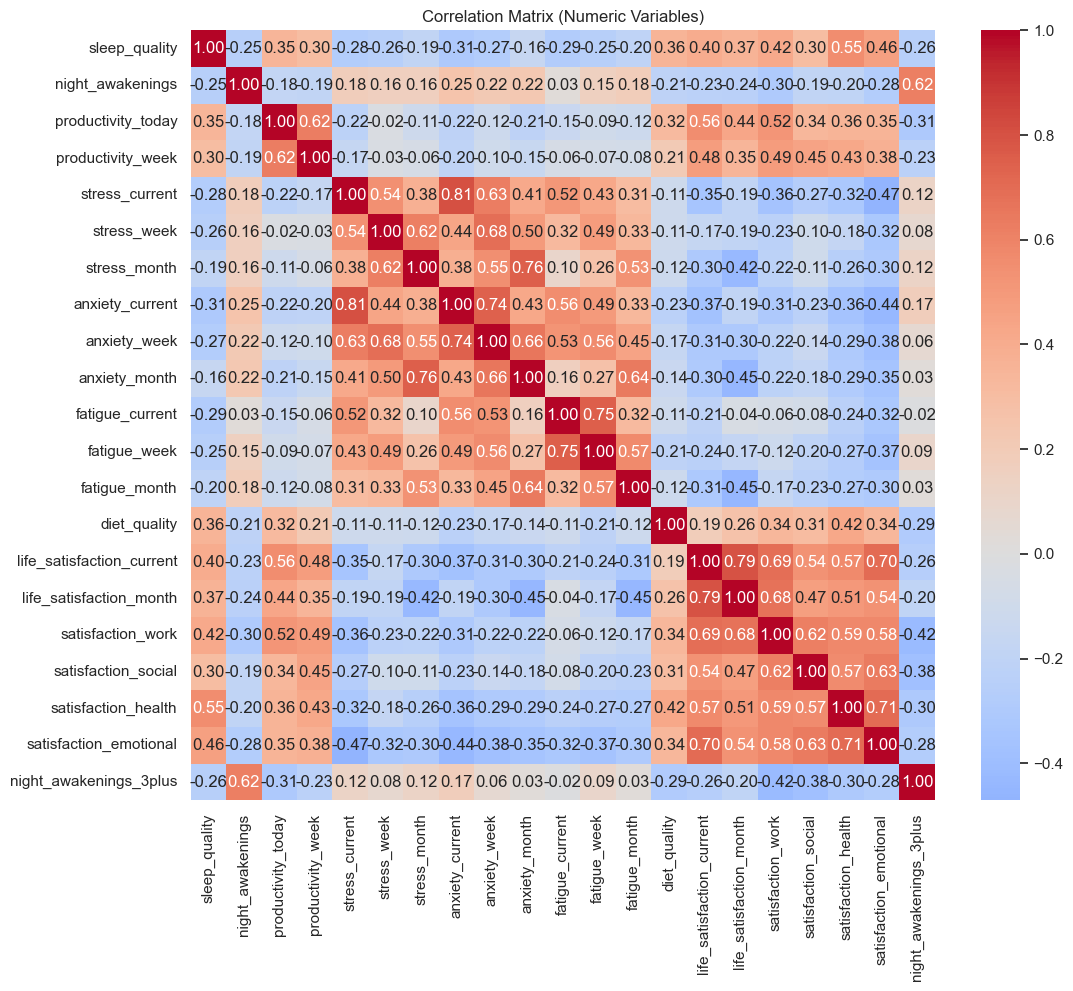

In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns       # (numeric only)

corr = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix (Numeric Variables)")
plt.show()

#### Корреляционный анализ числовых переменных

Корреляционный анализ показывает, что психоэмоциональные показатели (стресс, тревожность, усталость) тесно связаны между собой и устойчивы во времени, тогда как показатели удовлетворённости жизнью и благополучия формируют отдельный, но связанный блок. Качество сна и ночные пробуждения выступают важными связующими факторами между повседневными привычками и состоянием человека.

#### Корреляции повседневных привычек с индексами стресса и благополучия

In [ ]:
lifestyle_numeric = [
    "sleep_quality",
    "diet_quality"
]


In [ ]:
corr_subset = df[
    lifestyle_numeric + index_features
].corr(numeric_only=True)


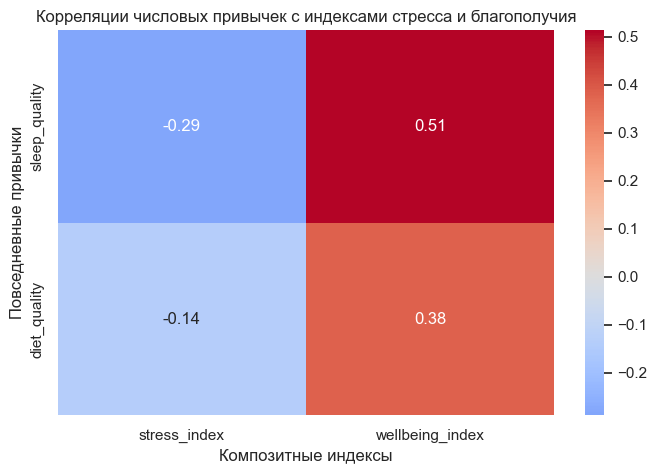

In [ ]:
plt.figure(figsize=(8, 5))

sns.heatmap(
    corr_subset.loc[lifestyle_numeric, index_features],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Корреляции числовых привычек с индексами стресса и благополучия")
plt.xlabel("Композитные индексы")
plt.ylabel("Повседневные привычки")

plt.show()


Тепловая карта показывает, что качество сна является более сильным фактором, связанным как со снижением стресса, так и с ростом благополучия, по сравнению с качеством питания. При этом ни одна из корреляций не является экстремально высокой, что подчёркивает многофакторную природу стресса и благополучия: повседневные привычки играют важную роль, но не объясняют состояние человека полностью.

## Композитные индексы

### Композитные индексы

In [ ]:
df["stress_index"] = df[
    [
        "stress_current",
        "stress_week",
        "stress_month"
    ]
].mean(axis=1)

### Индекс благополучия

In [ ]:
df["wellbeing_index"] = df[
    [
        "life_satisfaction_current",
        "satisfaction_work",
        "satisfaction_social",
        "satisfaction_health",
        "satisfaction_emotional"
    ]
].mean(axis=1)


In [ ]:
df[["stress_index", "wellbeing_index"]].head()

,stress_index,wellbeing_index
0,7.000000,6.4
1,8.333333,7.2
2,7.000000,6.8
3,6.666667,6.6
4,6.666667,6.8


### Распределения индексов

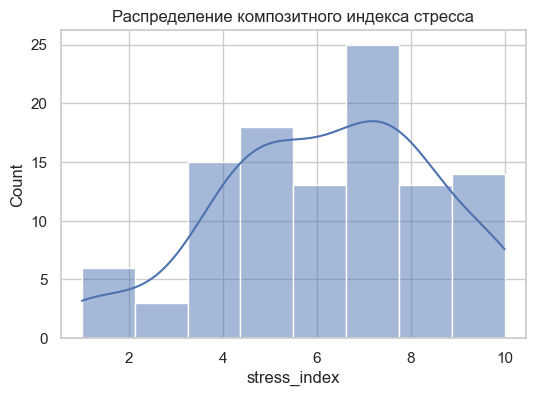

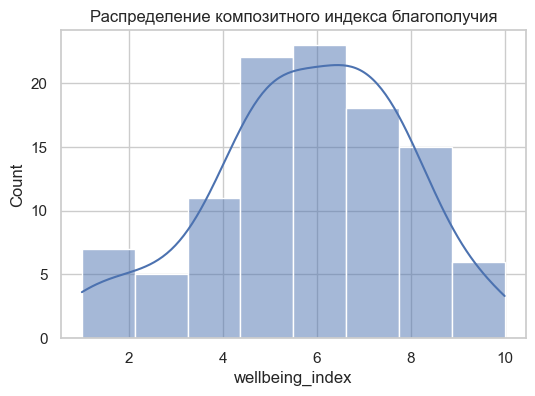

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["stress_index"], kde=True)
plt.title("Распределение композитного индекса стресса")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["wellbeing_index"], kde=True)
plt.title("Распределение композитного индекса благополучия")
plt.show()


Распределение **композитного индекса стресса** показывает, что значения стресса в выборке сосредоточены преимущественно в среднем и выше среднего диапазоне. Основная масса наблюдений находится в интервале примерно от 4 до 8 баллов, с пиком плотности в районе 6–7. Это говорит о том, что для большинства респондентов характерен умеренно повышенный уровень стресса, а крайние значения (очень низкий или очень высокий стресс) встречаются заметно реже. Левый хвост распределения относительно короткий, что указывает на небольшое количество людей с устойчиво низким уровнем стресса. Правый хвост более выражен, что может свидетельствовать о наличии группы респондентов с хронически высоким стрессом.

Распределение **композитного индекса благополучия** имеет более сглаженную и симметричную форму по сравнению с индексом стресса. Большинство значений сосредоточено в диапазоне от 5 до 8 баллов, с максимумом плотности около 6–7. Это указывает на то, что субъективное благополучие в выборке в целом находится на среднем уровне, без резкого смещения в сторону крайне низких или крайне высоких оценок. При этом наличие наблюдений как в нижнем, так и в верхнем диапазонах говорит о достаточно разнообразном восприятии качества жизни среди участников опроса.

### Связь стресс <-> благополучие

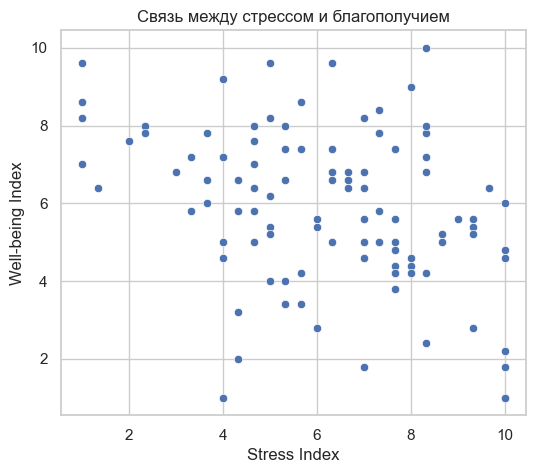

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=df["stress_index"],
    y=df["wellbeing_index"]
)
plt.xlabel("Stress Index")
plt.ylabel("Well-being Index")
plt.title("Связь между стрессом и благополучием")
plt.show()

Диаграмма рассеяния, отображающая **связь между композитным индексом стресса и индексом благополучия**, демонстрирует выраженную отрицательную зависимость. При увеличении уровня стресса значения индекса благополучия в среднем снижаются. Это хорошо заметно по тому, что точки с высокими значениями стресса (7–10) чаще располагаются в области низкого и среднего благополучия, тогда как при низком стрессе чаще наблюдаются более высокие значения благополучия. В то же время разброс точек остаётся значительным, что указывает на индивидуальные различия: высокий стресс не всегда означает крайне низкое благополучие и наоборот. Это подтверждает, что связь между стрессом и благополучием является устойчивой, но не строго детерминированной, и на общее состояние человека влияют и другие факторы.

## Анализ динамики
Для снижения влияния субъективности шкал анализируются изменения показателей
по сравнению с состоянием месяц назад.

In [ ]:
df["stress_delta_month"] = df["stress_current"] - df["stress_month"]
df["life_satisfaction_delta"] = (
    df["life_satisfaction_current"] - df["life_satisfaction_month"]
)

### Распределение изменений

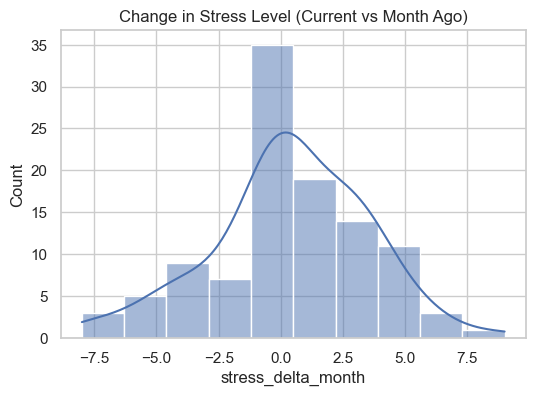

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["stress_delta_month"], bins=10, kde=True)
plt.title("Change in Stress Level (Current vs Month Ago)")
plt.show()

#### Изменение уровня стресса за месяц

График изменения уровня стресса по сравнению с состоянием месяц назад показывает, что у большинства респондентов изменения находятся вблизи нулевого значения. Это означает, что для значительной части выборки уровень стресса за месяц существенно не изменился. При этом распределение является достаточно широким: присутствуют как отрицательные значения, указывающие на снижение уровня стресса, так и положительные значения, отражающие его рост. Небольшая часть участников демонстрирует выраженные изменения в обе стороны. Такая картина говорит о том, что, несмотря на общую относительную стабильность, индивидуальные траектории изменения стресса заметно различаются.

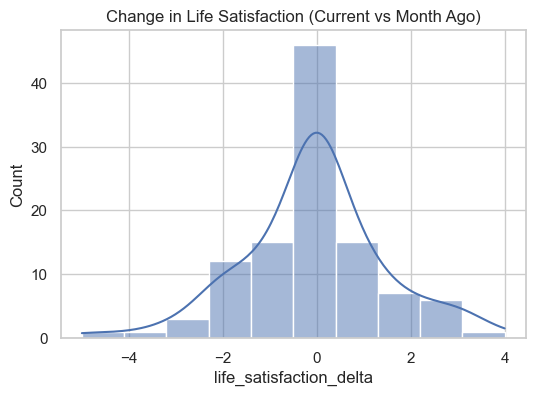

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["life_satisfaction_delta"], bins=10, kde=True)
plt.title("Change in Life Satisfaction (Current vs Month Ago)")
plt.show()


#### Изменение удовлетворённости жизнью за месяц

Распределение изменений удовлетворённости жизнью также сосредоточено вокруг нуля, что указывает на относительную стабильность данного показателя за рассматриваемый период. Большинство изменений лежит в диапазоне от небольшого снижения до небольшого роста. При этом крайние значения встречаются реже, чем в случае со стрессом, что говорит о меньшей амплитуде изменений удовлетворённости жизнью по сравнению с изменениями уровня стресса. Это может означать, что субъективное ощущение удовлетворённости жизнью более устойчиво к краткосрочным колебаниям повседневных условий.

#### Итоговый вывод по анализу динамики

Анализ изменений показателей за месяц показывает, что как уровень стресса, так и удовлетворённость жизнью в целом являются относительно стабильными характеристиками, однако внутри выборки присутствует заметная индивидуальная вариативность. У одних респондентов наблюдается улучшение состояния, у других — ухудшение, что создаёт основу для анализа факторов, связанных с этими изменениями.

### Временная динамика психоэмоциональных состояний (today – week – month)

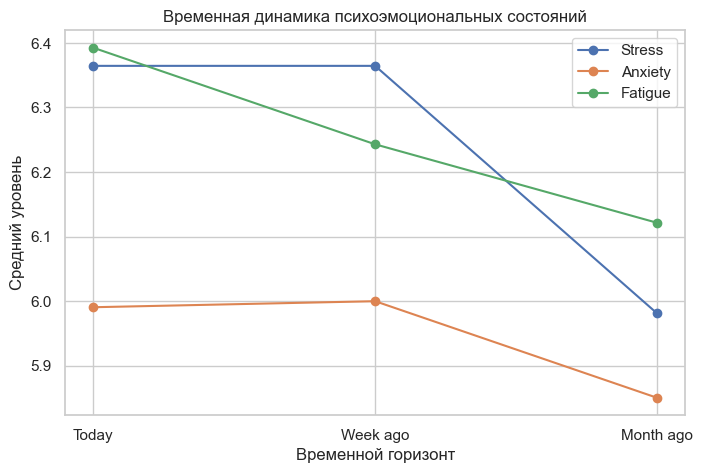

In [ ]:
# Средние значения по временным точкам
time_data = {
    "Today": [
        df["stress_current"].mean(),
        df["anxiety_current"].mean(),
        df["fatigue_current"].mean()
    ],
    "Week ago": [
        df["stress_week"].mean(),
        df["anxiety_week"].mean(),
        df["fatigue_week"].mean()
    ],
    "Month ago": [
        df["stress_month"].mean(),
        df["anxiety_month"].mean(),
        df["fatigue_month"].mean()
    ]
}

time_df = pd.DataFrame(
    time_data,
    index=["Stress", "Anxiety", "Fatigue"]
)

plt.figure(figsize=(8, 5))

for state in time_df.index:
    plt.plot(
        time_df.columns,
        time_df.loc[state],
        marker="o",
        label=state
    )

plt.title("Временная динамика психоэмоциональных состояний")
plt.xlabel("Временной горизонт")
plt.ylabel("Средний уровень")
plt.legend()
plt.grid(True)

plt.show()

График показывает, что все три состояния имеют тенденцию к росту при движении от более далёкого периода к настоящему времени, однако характер этой динамики различается. Стресс и усталость демонстрируют более заметные изменения, тогда как тревожность изменяется слабее. Это подчёркивает важность учёта временного аспекта при анализе психоэмоционального состояния, так как текущее состояние человека формируется не только под влиянием сегодняшних факторов, но и накопленных эффектов за предыдущие недели и месяц

## Сформированные гипотезы

На основе распределений, анализа связей, корреляционной матрицы и анализа изменений во времени были сформированы следующие гипотезы.

**H1**: Первая гипотеза заключается в том, что **качество сна отрицательно связано с уровнем стресса**. Графики и корреляционный анализ показывают, что при более высоком качестве сна уровень стресса в среднем ниже, тогда как плохой сон чаще сопровождается повышенным стрессом и усталостью.

**H2**: Вторая гипотеза состоит в том, что **использование экранов перед сном связано с ухудшением качества сна**. Респонденты, отмечающие умеренное или сильное негативное влияние экранов, в среднем демонстрируют более низкие оценки качества сна по сравнению с теми, кто не ощущает такого влияния.

**H3**: Третья гипотеза предполагает, что **регулярная физическая активность связана с более высокой удовлетворённостью жизнью**. Анализ распределений и boxplot-графики показывают, что у респондентов, тренирующихся несколько раз в неделю, медианные значения удовлетворённости жизнью выше, чем у тех, кто не занимается спортом или делает это редко.

**H4**: Четвёртая гипотеза заключается в том, что **ухудшение сна и рост ночных пробуждений связаны с увеличением уровня стресса и тревожности во времени**. Это подтверждается положительными корреляциями между ночными пробуждениями, стрессом и тревожностью, а также анализом изменений за месяц.


## Ограничения EDA

Во-первых, все данные основаны на самоотчётах респондентов, что может приводить к субъективным искажениям в оценке сна, стресса и благополучия. Разные люди могут по-разному интерпретировать одну и ту же числовую шкалу.

Во-вторых, исторические значения (неделю и месяц назад) являются ретроспективными оценками, а не результатом реального наблюдения во времени. Это создаёт риск ошибок памяти и снижает точность анализа динамики.

В-третьих, анализ выявляет ассоциативные связи, но не позволяет делать выводы о причинно-следственных отношениях. Например, плохой сон может быть связан с высоким стрессом, но нельзя однозначно утверждать, что именно сон является причиной роста стресса.

В-четвёртых, в анализе динамики предполагается относительная стабильность повседневных привычек за рассматриваемый период. Однако в реальности режим сна, физическая активность и экранное время могли изменяться, что не полностью отражено в данных.
